# Python - Using a Public API

In [3]:
# Used coinmarketcap.com API to grab and look at data involving Crypto currency.
# CoinMarketCap provides starter scripts in various languaged like Phyton to gain access.
# Modified a little bit to fit this example.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '78721993-d3d6-4a9b-a430-c7e9a7e4d5fb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-04-28T01:10:04.540Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 9420}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10192, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
type(data)

dict

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Data came in successfully, but it is in one big clump in a JSON and a Dictionary format.
# Making it more readible here within a data frame.

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10192,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.935797e+07,1.935797e+07,False,NaN,1,NaN,NaN,None,2023-04-28T01:08:00.000Z,29535.618672,2.547597e+10,-23.9891,0.093858,1.275112,4.548054,8.164431,25.841035,27.615071,5.717496e+11,47.1416,6.202480e+11,None,2023-04-28T01:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:10:12.219264+00:00
1,1027,Ethereum,ETH,ethereum,6792,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204024e+08,1.204024e+08,False,NaN,2,NaN,NaN,None,2023-04-28T01:08:00.000Z,1913.168265,1.306736e+10,-15.2448,0.168032,-0.352625,-1.758071,7.553978,17.017376,19.371663,2.303501e+11,18.9931,2.303501e+11,None,2023-04-28T01:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:10:12.219264+00:00
2,825,Tether,USDT,tether,52139,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.161554e+10,8.509064e+10,False,NaN,3,NaN,NaN,None,2023-04-28T01:08:00.000Z,1.000277,3.355000e+10,-26.4891,0.015096,-0.001524,0.008532,-0.027662,0.019292,0.011820,8.163817e+10,6.7307,8.511424e+10,None,2023-04-28T01:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-28 01:10:12.219264+00:00
3,1839,BNB,BNB,bnb,1294,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558633e+08,1.558633e+08,False,NaN,4,NaN,NaN,None,2023-04-28T01:08:00.000Z,328.814904,7.261316e+08,-24.4919,-0.513017,-1.744686,3.016681,4.777278,6.827482,6.405110,5.125016e+10,4.2257,5.125016e+10,None,2023-04-28T01:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:10:12.219264+00:00
4,3408,USD Coin,USDC,usd-coin,12065,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.053373e+10,3.053373e+10,False,NaN,5,NaN,NaN,None,2023-04-28T01:08:00.000Z,0.999888,5.175563e+09,-26.7557,0.009030,-0.021466,-0.025593,-0.030889,-0.008017,-0.007513,3.053029e+10,2.5171,3.053029e+10,None,2023-04-28T01:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-28 01:10:12.219264+00:00
5,52,XRP,XRP,xrp,937,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,None,2023-04-28T01:08:00.000Z,0.466176,1.587497e+09,-2.8203,-0.063888,-0.257527,-1.809003,-10.394755,23.505326,12.561666,2.412498e+10,1.9891,4.661759e+10,None,2023-04-28T01:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:10:12.219264+00:00
6,2010,Cardano,ADA,cardano,772,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.480009e+10,3.572784e+10,False,NaN,7,NaN,NaN,None,2023-04-28T01:08:00.000Z,0.410387,3.749371e+08,-26.1708,0.050677,0.018055,1.934915,11.677638,11.959025,3.352191,1.428150e+10,1.1778,1.846741e+10,None,2023-04-28T01:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:10:12.219264+00:00
7,74,Dogecoin,DOGE,dogecoin,696,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.391176e+11,1.391176e+11,False,NaN,8,NaN,NaN,None,2023-04-28T01:08:00.000Z,0.080264,3.978265e+08,-47.0281,0.145359,0.188078,-4.854108,8.830784,-1.831893,-8.786364,1.116608e+10,0.9208,1.116608e+10,None,2023-04-28T01:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:10:12.219264+00:00
8,3890,Polygon,MATIC,polygon,673,2019-04-28T00:00:00.000Z,"[platfor

In [7]:
# Function to automatically keep making calls out to the API, and fetching the latest set of data,

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '78721993-d3d6-4a9b-a430-c7e9a7e4d5fb',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    
    # To bring data in and appending it to the existing data frame.
    
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df,df_append])
    df
    
    # To send the data brought in to a CSV file.
    
    if not os.path.isfile(r'C:\Users\user\API.csv'): #if the file does not yet exist
        df.to_csv(r'C:\Users\user\API.csv', header='column_names')
    else: #appending to the existing file instead
        df.to_csv(r'C:\Users\user\API.csv', mode='a', header=False)

In [9]:
# Automating process of running the script

import os 
from time import time
from time import sleep

# CoinMarketCap allows 333 API calls a day so.
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) # sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [15]:
# Reading back in the CSV file that was created on my local computer.
# It has two sets of data from it running twice before I terminated the program,
# hence the two "API Runner completed" statements above.

df_csv = pd.read_csv(r'C:\Users\user\API.csv')

In [11]:
# Will practice a little bit of data cleaning, removing the scientific notation from columns
# of the CSV file brought in.
pd.set_option('display.float_format', lambda x: '% 5f' % x)

In [12]:
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10192,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19357968.000000,19357968.000000,False,NaN,1,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,29506.796886,25466308464.086521,-24.055200,0.058513,1.292921,4.567623,8.100760,25.728075,27.530662,571191629911.311646,47.130300,619642734616.439941,NaN,2023-04-28T01:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:12:31.868791+00:00
1,1,1027,Ethereum,ETH,ethereum,6792,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120402439.830906,120402439.830906,False,NaN,2,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,1911.070093,13044724063.895599,-15.473300,0.095254,-0.477470,-1.713539,7.477595,16.917645,19.346157,230097501828.256409,18.981700,230097501828.260010,NaN,2023-04-28T01:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:12:31.868791+00:00
2,2,825,Tether,USDT,tether,52140,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81615536097.752090,85090638896.270859,False,NaN,3,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,1.000388,33538159474.227360,-26.542600,0.010438,0.034796,0.027791,0.007119,0.029825,0.024456,81647195865.730621,6.734100,85123646703.529999,NaN,2023-04-28T01:11:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-28 01:12:31.868791+00:00
3,3,1839,BNB,BNB,bnb,1294,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155863259.817313,155863259.817313,False,NaN,4,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,328.413872,727210374.806210,-24.312500,-0.704347,-1.879310,3.053771,4.654638,6.676706,6.352007,51187656656.407417,4.222700,51187656656.410004,NaN,2023-04-28T01:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:12:31.868791+00:00
4,4,3408,USD Coin,USDC,usd-coin,12065,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30533726557.887390,30533726557.887390,False,NaN,5,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,0.999997,5171438693.055389,-26.878400,0.004218,0.014747,-0.004301,0.009770,0.006679,-0.001449,30533622041.733067,2.518300,30533622041.730000,NaN,2023-04-28T01:11:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-28 01:12:31.868791+00:00
5,5,52,XRP,XRP,xrp,937,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,51750810378.000000,99988998998.000000,False,NaN,6,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,0.466048,1585765532.955254,-2.970400,-0.134230,-0.296868,-1.681885,-10.330474,23.494091,12.641648,24118362162.314011,1.988600,46604800941.570000,NaN,2023-04-28T01:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:12:31.868791+00:00
6,6,2010,Cardano,ADA,cardano,772,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.000000,34800090009.614998,35727842284.508003,False,NaN,7,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,0.410192,374702723.807436,-26.219100,-0.108566,0.035448,2.087348,11.637594,11.963655,3.432434,14274701988.937868,1.177200,18458618622.099998,NaN,2023-04-28T01:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-28 01:12:31.868791+00:00
7,7,74,Dogecoin,DOGE,dogecoin,696,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139117606383.705200,139117606383.705200,False,NaN,8,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,0

In [16]:
# Remove first column that is unnecessary and like a secondindex column.
# Remove all the columns that begin with the word "platform"
# Remove additional unnecessary columns in different, more streamlined ways

df_csv = df_csv.iloc[: , 1:]
df_csv = df_csv[df_csv.columns.drop(list(df_csv.filter(regex='platform')))]
df_csv = df_csv.drop(columns=['symbol', 'slug', 'num_market_pairs', 'tags', 'quote.USD.market_cap', 'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap', 'quote.USD.tvl' ])

In [17]:
df_csv

,id,name,date_added,max_supply,circulating_supply,total_supply,infinite_supply,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.last_updated,timestamp
0,1,Bitcoin,2010-07-13T00:00:00.000Z,21000000.000000,19357968.000000,19357968.000000,False,1,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,29506.796886,25466308464.086521,-24.055200,0.058513,1.292921,4.567623,8.100760,25.728075,27.530662,2023-04-28T01:11:00.000Z,2023-04-28 01:12:31.868791+00:00
1,1027,Ethereum,2015-08-07T00:00:00.000Z,NaN,120402439.830906,120402439.830906,False,2,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,1911.070093,13044724063.895599,-15.473300,0.095254,-0.477470,-1.713539,7.477595,16.917645,19.346157,2023-04-28T01:11:00.000Z,2023-04-28 01:12:31.868791+00:00
2,825,Tether,2015-02-25T00:00:00.000Z,NaN,81615536097.752090,85090638896.270859,False,3,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,1.000388,33538159474.227360,-26.542600,0.010438,0.034796,0.027791,0.007119,0.029825,0.024456,2023-04-28T01:11:00.000Z,2023-04-28 01:12:31.868791+00:00
3,1839,BNB,2017-07-25T00:00:00.000Z,NaN,155863259.817313,155863259.817313,False,4,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,328.413872,727210374.806210,-24.312500,-0.704347,-1.879310,3.053771,4.654638,6.676706,6.352007,2023-04-28T01:11:00.000Z,2023-04-28 01:12:31.868791+00:00
4,3408,USD Coin,2018-10-08T00:00:00.000Z,NaN,30533726557.887390,30533726557.887390,False,5,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,0.999997,5171438693.055389,-26.878400,0.004218,0.014747,-0.004301,0.009770,0.006679,-0.001449,2023-04-28T01:11:00.000Z,2023-04-28 01:12:31.868791+00:00
5,52,XRP,2013-08-04T00:00:00.000Z,100000000000.000000,51750810378.000000,99988998998.000000,False,6,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,0.466048,1585765532.955254,-2.970400,-0.134230,-0.296868,-1.681885,-10.330474,23.494091,12.641648,2023-04-28T01:11:00.000Z,2023-04-28 01:12:31.868791+00:00
6,2010,Cardano,2017-10-01T00:00:00.000Z,45000000000.000000,34800090009.614998,35727842284.508003,False,7,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,0.410192,374702723.807436,-26.219100,-0.108566,0.035448,2.087348,11.637594,11.963655,3.432434,2023-04-28T01:11:00.000Z,2023-04-28 01:12:31.868791+00:00
7,74,Dogecoin,2013-12-15T00:00:00.000Z,NaN,139117606383.705200,139117606383.705200,False,8,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,0.080235,397595568.301315,-47.048500,0.025566,0.170371,-4.582037,8.790896,-1.848901,-8.664337,2023-04-28T01:11:00.000Z,2023-04-28 01:12:31.868791+00:00
8,3890,Polygon,2019-04-28T00:00:00.000Z,10000000000.000000,9249469069.284929,10000000000.000000,False,9,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,1.014176,493114809.871684,-27.487900,0.111692,0.077871,-3.609515,-6.829236,-20.080590,-11.909141,2023-04-28T01:11:00.000Z,2023-04-28 01:12:31.868791+00:00
9,5426,Solana,2020-04-10T00:00:00.000Z,NaN,392894815.607193,539312704.887534,False,10,NaN,NaN,NaN,2023-04-28T01:11:00.000Z,22.584120,457125979.947695,-38.610200,0.827657,2.872215,1.602596,9.526555,-2.033064,-8.285655,2023-04-28T01:11:00.000Z,2023-04-28 01:12:31.868791+00:00


In [40]:
# Using one set of data, one API call. Let's get a feel for the marketshare of
# each, and also get a taste of doing a data visualization with the data.

df.set_index('name', inplace=True)

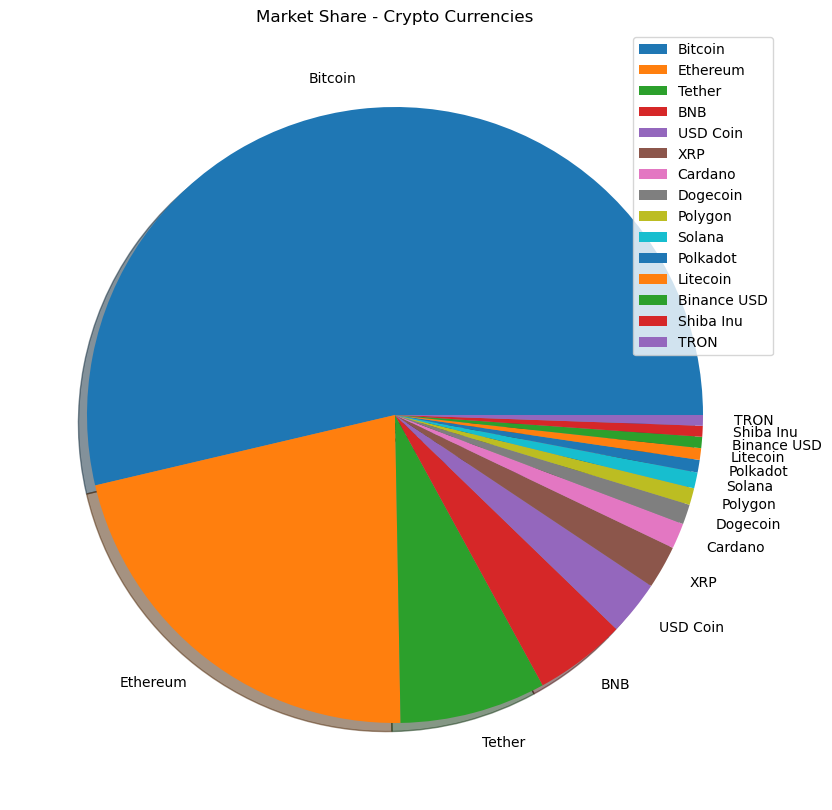

In [41]:
# Using one set of data, one API call. Let's get a feel for the marketshare of
# each, and also get a taste of doing a data visualization with the data.

plot = df.plot.pie(y='quote.USD.market_cap_dominance', figsize=(10, 10),
                   title='Market Share - Crypto Currencies', shadow=True, ylabel='', )